In [1]:
import pandas as pd
import os
import shutil
import json
from collections import Counter
import matplotlib.pyplot as plt


In [4]:
IMG_PATH            = '../assignment_data_bdd/bdd100k_images_100k/bdd100k/images/100k/'
LABELS_PATH         = f'../assignment_data_bdd/bdd100k_labels_release/bdd100k/labels'
TRAIN_LABELS_JSON   = f'{LABELS_PATH}/bdd100k_labels_images_train.json'
VAL_LABELS_JSON     = f'{LABELS_PATH}/bdd100k_labels_images_val.json'
TRAIN_IMAGES_PATH   = f'{IMG_PATH}/train'

In [5]:
train_df = pd.read_json(TRAIN_LABELS_JSON)

In [6]:
train_df.shape

(69863, 4)

In [7]:
val_df = pd.read_json(VAL_LABELS_JSON)

In [8]:
val_df.shape

(10000, 4)

In [9]:
train_df.head()

name                                         attributes  \
0  0000f77c-6257be58.jpg  {'weather': 'clear', 'scene': 'city street', '...   
1  0000f77c-62c2a288.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  0000f77c-cb820c98.jpg  {'weather': 'clear', 'scene': 'residential', '...   
3  0001542f-5ce3cf52.jpg  {'weather': 'clear', 'scene': 'city street', '...   
4  0001542f-7c670be8.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   

   timestamp                                             labels  
0      10000  [{'category': 'traffic light', 'attributes': {...  
1      10000  [{'category': 'traffic sign', 'attributes': {'...  
2      10000  [{'category': 'car', 'attributes': {'occluded'...  
3      10000  [{'category': 'traffic sign', 'attributes': {'...  
4      10000  [{'category': 'car', 'attributes': {'occluded'...

In [10]:
train_df.tail()

name  \
69858  fe172415-3c36f3d1.jpg   
69859  fe189115-11bedd21.jpg   
69860  fe189115-352995ee.jpg   
69861  fe189115-354e7981.jpg   
69862  fe189115-8dabb5b1.jpg   

                                              attributes  timestamp  \
69858  {'weather': 'overcast', 'scene': 'highway', 't...      10000   
69859  {'weather': 'partly cloudy', 'scene': 'city st...      10000   
69860  {'weather': 'undefined', 'scene': 'city street...      10000   
69861  {'weather': 'undefined', 'scene': 'city street...      10000   
69862  {'weather': 'undefined', 'scene': 'highway', '...      10000   

                                                  labels  
69858  [{'category': 'car', 'attributes': {'occluded'...  
69859  [{'category': 'car', 'attributes': {'occluded'...  
69860  [{'category': 'traffic light', 'attributes': {...  
69861  [{'category': 'traffic light', 'attributes': {...  
69862  [{'category': 'traffic sign', 'attributes': {'...

In [11]:
val_df.head()

name                                         attributes  \
0  b1c66a42-6f7d68ca.jpg  {'weather': 'overcast', 'scene': 'city street'...   
1  b1c81faa-3df17267.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  b1c81faa-c80764c5.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
3  b1c9c847-3bda4659.jpg  {'weather': 'undefined', 'scene': 'city street...   
4  b1ca2e5d-84cf9134.jpg  {'weather': 'clear', 'scene': 'city street', '...   

   timestamp                                             labels  
0      10000  [{'category': 'traffic sign', 'attributes': {'...  
1      10000  [{'category': 'car', 'attributes': {'occluded'...  
2      10000  [{'category': 'traffic sign', 'attributes': {'...  
3      10000  [{'category': 'traffic sign', 'attributes': {'...  
4      10000  [{'category': 'car', 'attributes': {'occluded'...

In [12]:
print(train_df['timestamp'].unique())
print(val_df['timestamp'].unique())

[10000]
[10000]


In [13]:
train_df.drop(['timestamp'], axis=1, inplace=True)
val_df.drop(['timestamp'], axis=1, inplace=True)

In [14]:
train_df.iloc[1,0]

'0000f77c-62c2a288.jpg'

In [15]:
train_df.iloc[1,2]

[{'category': 'traffic sign',
  'attributes': {'occluded': False,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 250.549246,
   'y1': 294.619798,
   'x2': 308.085801,
   'y2': 357.05308},
  'id': 11},
 {'category': 'traffic sign',
  'attributes': {'occluded': True,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 206.478694,
   'y1': 299.516526,
   'x2': 221.16888,
   'y2': 321.551802},
  'id': 12},
 {'category': 'traffic sign',
  'attributes': {'occluded': False,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': True,
  'box2d': {'x1': 924.665474,
   'y1': 286.866651,
   'x2': 936.907294,
   'y2': 297.884289},
  'id': 13},
 {'category': 'person',
  'attributes': {'occluded': False,
   'truncated': False,
   'trafficLightColor': 'none'},
  'manualShape': True,
  'manualAttributes': Tr

### Finding Duplicate Images

In [16]:
# Check for duplicate filenames
print(train_df['name'][train_df['name'].duplicated()].unique())
print(val_df['name'][train_df['name'].duplicated()].unique())

[]
[]


In [17]:
# !pip install pillow imagehash

In [18]:
# import os
# from PIL import Image
# import imagehash
# from itertools import combinations

# # Path to your image folder
# folder_path = TRAIN_IMAGES_PATH  # change this

# # Choose your hash method: phash, average_hash, dhash, or whash
# hash_func = imagehash.average_hash

# # Store hashes and filenames
# image_hashes = {}

# # Step 1: Compute hashes
# for filename in os.listdir(folder_path):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
#         filepath = os.path.join(folder_path, filename)
#         try:
#             img = Image.open(filepath)
#             img_hash = hash_func(img)
#             image_hashes[filename] = img_hash
#         except Exception as e:
#             print(f"Error processing {filename}: {e}")

In [19]:
# # Convert hashes to strings for JSON serialization
# hash_dict_serializable = {fname: str(h) for fname, h in image_hashes.items()}

# # Save to JSON file
# with open("image_hashes.json", "w") as f:
#     json.dump(hash_dict_serializable, f, indent=4)

# print("✅ Image hashes saved to image_hashes.json")


In [20]:
# from collections import defaultdict
# import imagehash
# from PIL import Image
# import os

# folder = TRAIN_IMAGES_PATH
# hash_func = imagehash.average_hash
# bucket_size = 8  # Use first 8 hex digits (~32 bits)

# # Step 1: Create buckets
# buckets = defaultdict(list)
# for fname in os.listdir(folder):
#     if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
#         try:
#             img = Image.open(os.path.join(folder, fname))
#             h = str(hash_func(img))[:bucket_size]
#             buckets[h].append((fname, hash_func(img)))
#         except:
#             continue


In [21]:
# # Step 2: Compare within buckets
# threshold = 0
# results = []
# for bucket in buckets.values():
#     for i in range(len(bucket)):
#         for j in range(i + 1, len(bucket)):
#             diff = bucket[i][1] - bucket[j][1]
#             if diff <= threshold:
#                 results.append((bucket[i][0], bucket[j][0], diff))

In [22]:
# df_results = pd.DataFrame(results, columns=["Image 1", "Image 2", "Hash Difference"])
# df_results.to_csv("similar_images.csv", index=False)
# print("✅ Results saved to similar_images.csv")


### Checking the unique values in each column

In [23]:
set(train_df['attributes'].apply(lambda x: x['weather']).tolist())

{'clear', 'foggy', 'overcast', 'partly cloudy', 'rainy', 'snowy', 'undefined'}

In [24]:
set(val_df['attributes'].apply(lambda x: x['weather']).tolist())

{'clear', 'foggy', 'overcast', 'partly cloudy', 'rainy', 'snowy', 'undefined'}

In [25]:
set(train_df['attributes'].apply(lambda x: x['scene']).tolist())

{'city street',
 'gas stations',
 'highway',
 'parking lot',
 'residential',
 'tunnel',
 'undefined'}

In [26]:
set(val_df['attributes'].apply(lambda x: x['scene']).tolist())

{'city street',
 'gas stations',
 'highway',
 'parking lot',
 'residential',
 'tunnel',
 'undefined'}

In [27]:
set(train_df['attributes'].apply(lambda x: x['timeofday']).tolist())

{'dawn/dusk', 'daytime', 'night', 'undefined'}

In [28]:
set(val_df['attributes'].apply(lambda x: x['timeofday']).tolist())

{'dawn/dusk', 'daytime', 'night', 'undefined'}

### Analysing the count of each value in different columns

In [29]:
def bar_chart(column, title, xlabel, is_training):
    if is_training:
        data = Counter(train_df['attributes'].apply(lambda x: x[column]).tolist())
    else:
        data = Counter(val_df['attributes'].apply(lambda x: x[column]).tolist())
    print(data)
    labels, values = zip(*data.items())

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(f"{title} Distribution")
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Counter({'clear': 37344, 'overcast': 8770, 'undefined': 8119, 'snowy': 5549, 'rainy': 5070, 'partly cloudy': 4881, 'foggy': 130})


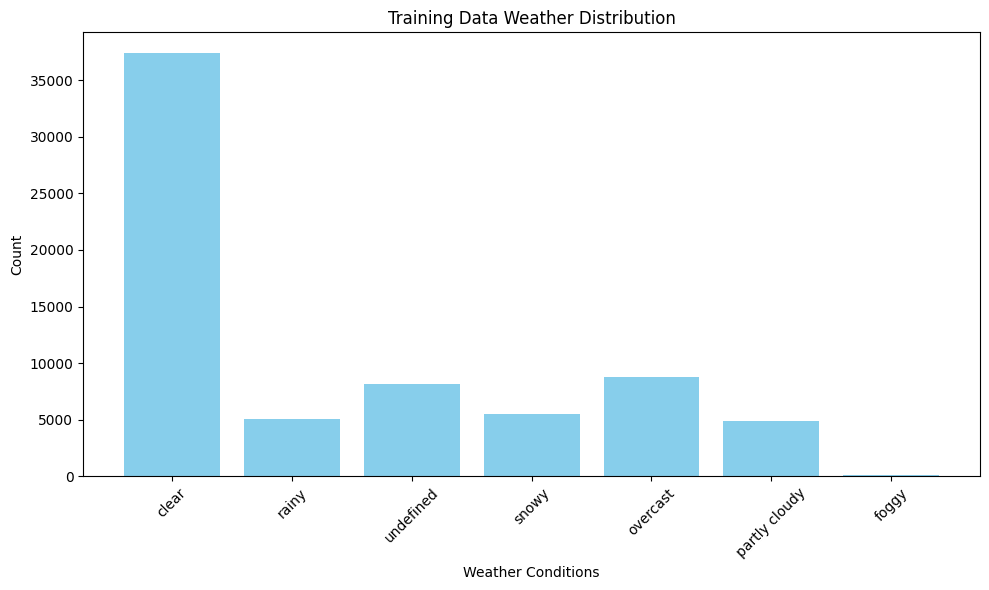

In [30]:
bar_chart('weather', 'Training Data Weather', 'Weather Conditions', True)

Counter({'clear': 5346, 'overcast': 1239, 'undefined': 1157, 'snowy': 769, 'rainy': 738, 'partly cloudy': 738, 'foggy': 13})


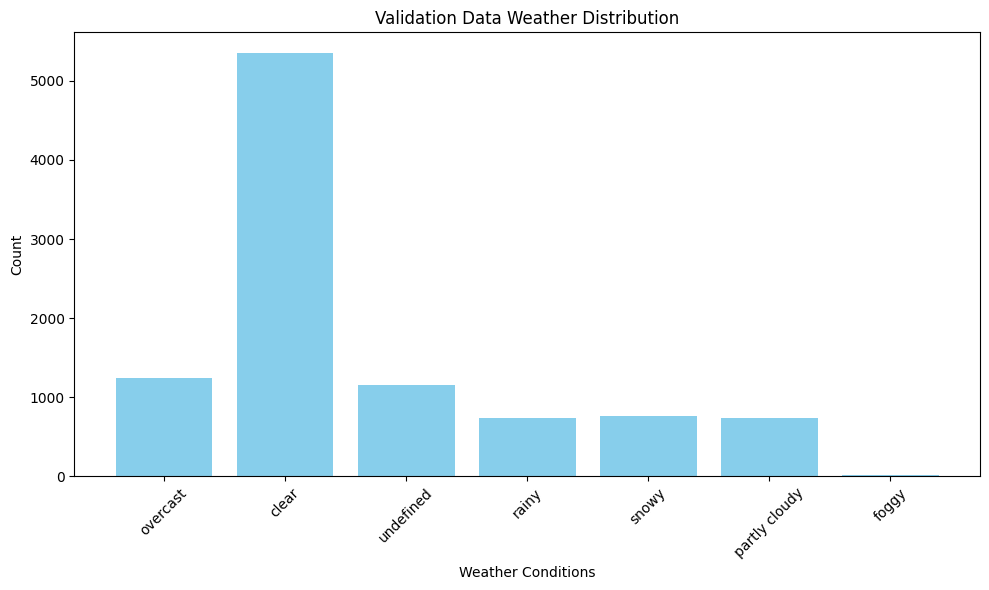

In [31]:
bar_chart('weather', 'Validation Data Weather', 'Weather Conditions', False)

Counter({'city street': 43516, 'highway': 17379, 'residential': 8074, 'parking lot': 377, 'undefined': 361, 'tunnel': 129, 'gas stations': 27})


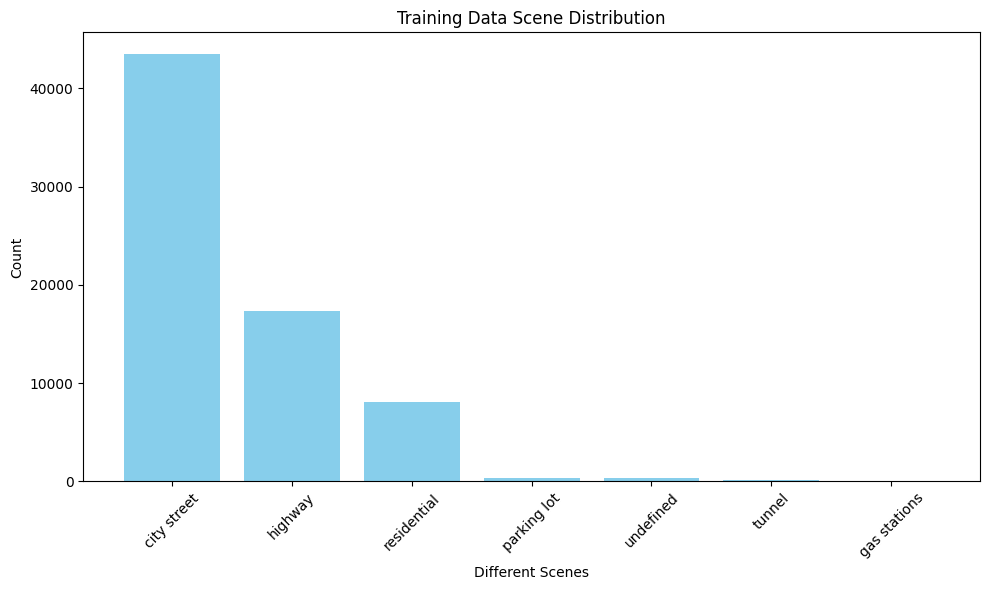

In [32]:
bar_chart('scene', 'Training Data Scene', 'Different Scenes', True)

Counter({'city street': 6112, 'highway': 2499, 'residential': 1253, 'undefined': 53, 'parking lot': 49, 'tunnel': 27, 'gas stations': 7})


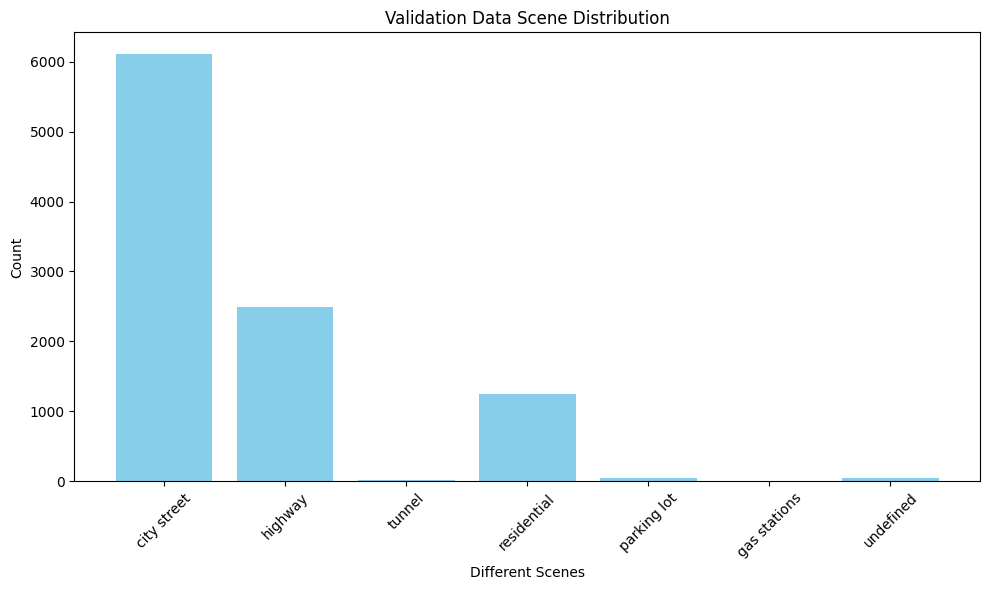

In [33]:
bar_chart('scene', 'Validation Data Scene', 'Different Scenes', False)

Counter({'daytime': 36728, 'night': 27971, 'dawn/dusk': 5027, 'undefined': 137})


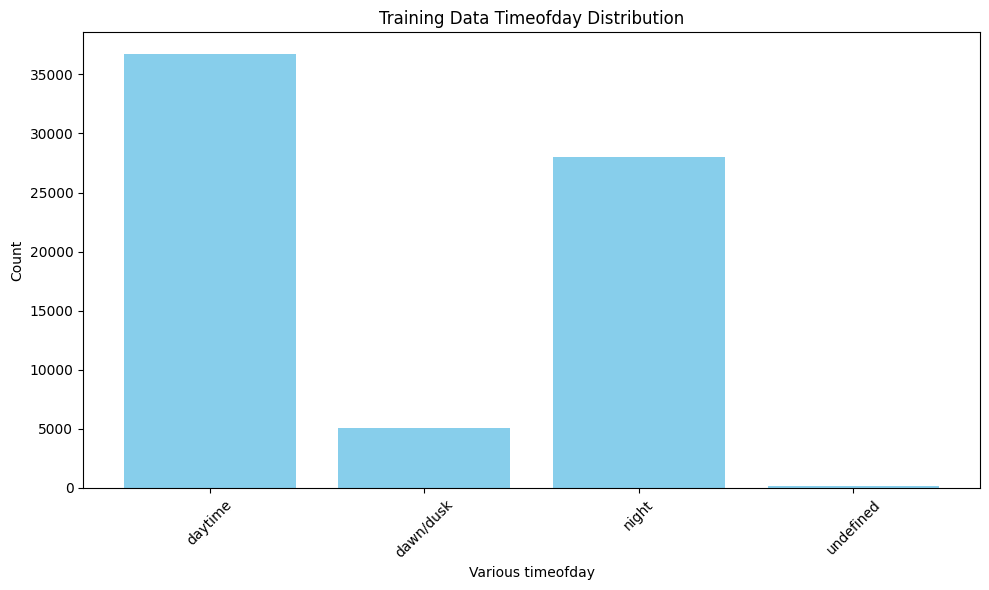

In [34]:
bar_chart('timeofday', 'Training Data Timeofday', 'Various timeofday', True)

Counter({'daytime': 5258, 'night': 3929, 'dawn/dusk': 778, 'undefined': 35})


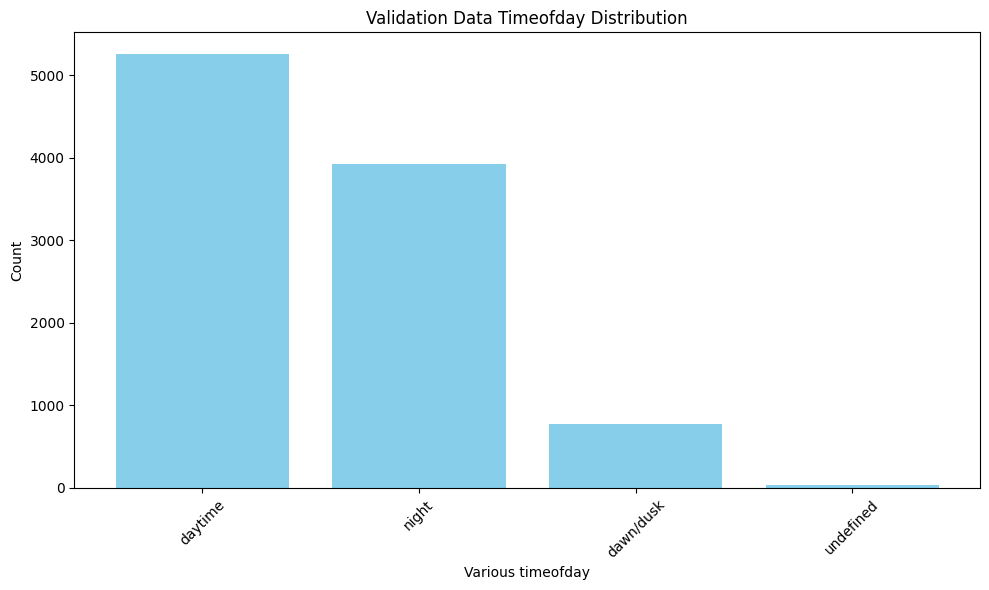

In [35]:
bar_chart('timeofday', 'Validation Data Timeofday', 'Various timeofday', False)

### Creating new columns for each attribute

In [36]:
train_df['weather'] = train_df['attributes'].apply(lambda x: x['weather'])
train_df['scene'] = train_df['attributes'].apply(lambda x: x['scene'])
train_df['timeofday'] = train_df['attributes'].apply(lambda x: x['timeofday'])

In [37]:
val_df['weather'] = val_df['attributes'].apply(lambda x: x['weather'])
val_df['scene'] = val_df['attributes'].apply(lambda x: x['scene'])
val_df['timeofday'] = val_df['attributes'].apply(lambda x: x['timeofday'])

In [38]:
train_df.head(10)

name                                         attributes  \
0  0000f77c-6257be58.jpg  {'weather': 'clear', 'scene': 'city street', '...   
1  0000f77c-62c2a288.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  0000f77c-cb820c98.jpg  {'weather': 'clear', 'scene': 'residential', '...   
3  0001542f-5ce3cf52.jpg  {'weather': 'clear', 'scene': 'city street', '...   
4  0001542f-7c670be8.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
5  0001542f-ec815219.jpg  {'weather': 'clear', 'scene': 'city street', '...   
6  0004974f-05e1c285.jpg  {'weather': 'rainy', 'scene': 'highway', 'time...   
7  00054602-3bf57337.jpg  {'weather': 'clear', 'scene': 'city street', '...   
8  00067cfb-5443fe39.jpg  {'weather': 'clear', 'scene': 'city street', '...   
9  00067cfb-5adfaaa7.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   

                                              labels weather        scene  \
0  [{'category': 'traffic light', 'attributes': {...   clear  city street   
1  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   
2  [{'category': 'car', 'attributes': {'occluded'...   clear  residential   
3  [{'category': 'traffic sign', 'attributes': {'...   clear  city street   
4  [{'category': 'car', 'attributes': {'occluded'...   clear      highway   
5  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
6  [{'category': 'car', 'attributes': {'occluded'...   rainy      highway   
7  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
8  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
9  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   

   timeofday  
0    daytime  
1  dawn/dusk  
2  dawn/dusk  
3      night  
4      night  
5      night  
6      night  
7    daytime  
8    daytime  
9      night

### Creating new columns for each Class with its count

In [39]:
train_df['categories'] = train_df['labels'].apply(lambda x: [item['category'] for item in x])

counts = train_df['categories'].apply(pd.Series).stack().reset_index(level=1, drop=True)
dummies = pd.get_dummies(counts)
counts_per_row = dummies.groupby(dummies.index).sum()

train_df = train_df.join(counts_per_row)

In [40]:
train_df.head(10)

name                                         attributes  \
0  0000f77c-6257be58.jpg  {'weather': 'clear', 'scene': 'city street', '...   
1  0000f77c-62c2a288.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
2  0000f77c-cb820c98.jpg  {'weather': 'clear', 'scene': 'residential', '...   
3  0001542f-5ce3cf52.jpg  {'weather': 'clear', 'scene': 'city street', '...   
4  0001542f-7c670be8.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   
5  0001542f-ec815219.jpg  {'weather': 'clear', 'scene': 'city street', '...   
6  0004974f-05e1c285.jpg  {'weather': 'rainy', 'scene': 'highway', 'time...   
7  00054602-3bf57337.jpg  {'weather': 'clear', 'scene': 'city street', '...   
8  00067cfb-5443fe39.jpg  {'weather': 'clear', 'scene': 'city street', '...   
9  00067cfb-5adfaaa7.jpg  {'weather': 'clear', 'scene': 'highway', 'time...   

                                              labels weather        scene  \
0  [{'category': 'traffic light', 'attributes': {...   clear  city street   
1  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   
2  [{'category': 'car', 'attributes': {'occluded'...   clear  residential   
3  [{'category': 'traffic sign', 'attributes': {'...   clear  city street   
4  [{'category': 'car', 'attributes': {'occluded'...   clear      highway   
5  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
6  [{'category': 'car', 'attributes': {'occluded'...   rainy      highway   
7  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
8  [{'category': 'car', 'attributes': {'occluded'...   clear  city street   
9  [{'category': 'traffic sign', 'attributes': {'...   clear      highway   

   timeofday                                         categories  bike  bus  \
0    daytime  [traffic light, traffic light, traffic sign, t...     0    0   
1  dawn/dusk  [traffic sign, traffic sign, traffic sign, per...     0    0   
2  dawn/dusk  [car, car, car, car, car, car, car, drivable a...     0    0   
3      night  [traffic sign, traffic light, traffic light, c...     0    1   
4      night  [car, car, person, car, traffic light, traffic...     0    0   
5      night  [car, car, car, car, car, car, car, car, traff...     0    0   
6      night  [car, car, car, car, car, car, drivable area, ...     0    0   
7    daytime  [car, car, car, car, car, drivable area, lane,...     0    0   
8    daytime  [car, car, car, car, car, car, car, car, car, ...     0    0   
9      night  [traffic sign, traffic sign, traffic sign, tra...     0    0   

   car  drivable area  lane  motor  person  rider  traffic light  \
0    2              1     3      0       0      0              2   
1    0              3     8      0       3      0              0   
2    7              1     4      0       0      0              0   
3    9              1     4      0       0      0              2   
4    3              1     4      0       1      0              2   
5    9              3     4      0       0      0              0   
6    6              3     8      0       0      0              0   
7    5              1     2      0       0      0              0   
8   17              1    10      0       1      0              3   
9    7              2     5      0       0      0              0   

   traffic sign  train  truck  
0             3      0      0  
1             3      0      0  
2             0      0      0  
3             1      0      0  
4             2      0      0  
5             2      0      0  
6             0      0      0  
7             0      0      0  
8             2      0      0  
9             7      0      1

### Creating new column for every class under Categories

In [41]:
val_df['categories'] = val_df['labels'].apply(lambda x: [item['category'] for item in x])

counts = val_df['categories'].apply(pd.Series).stack().reset_index(level=1, drop=True)
dummies = pd.get_dummies(counts)
counts_per_row = dummies.groupby(dummies.index).sum()

val_df = val_df.join(counts_per_row)

In [42]:
all_categories = [item['category'] for row in train_df['labels'] for item in row]

category_counts = Counter(all_categories)

train_category_count_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)
print(train_category_count_df)

         Category   Count
2             car  713211
4            lane  528643
1    traffic sign  239686
0   traffic light  186117
3   drivable area  125723
5          person   91349
7           truck   29971
6             bus   11672
9            bike    7210
8           rider    4517
10          motor    3002
11          train     136


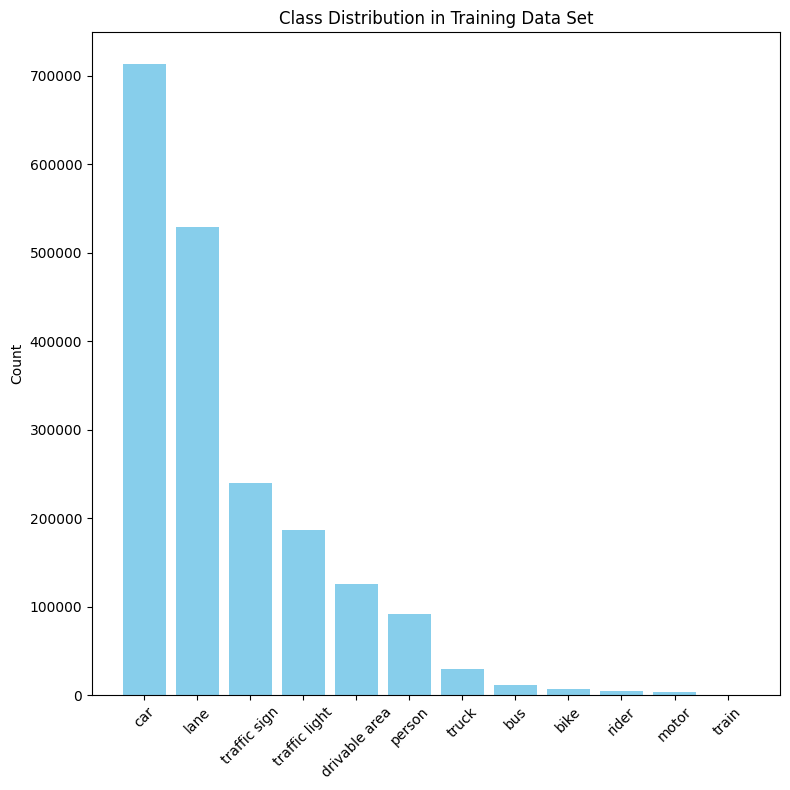

In [43]:
plt.figure(figsize=(8, 8))
plt.bar(train_category_count_df['Category'], train_category_count_df['Count'], color='skyblue')
plt.title(f"Class Distribution in Training Data Set")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [44]:
all_categories = [item['category'] for row in val_df['labels'] for item in row]

category_counts = Counter(all_categories)

val_category_count_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)
print(val_category_count_df)

         Category   Count
2             car  102506
6            lane   75730
0    traffic sign   34908
1   traffic light   26885
5   drivable area   17981
7          person   13262
9           truck    4245
8             bus    1597
10           bike    1007
3           rider     649
4           motor     452
11          train      15


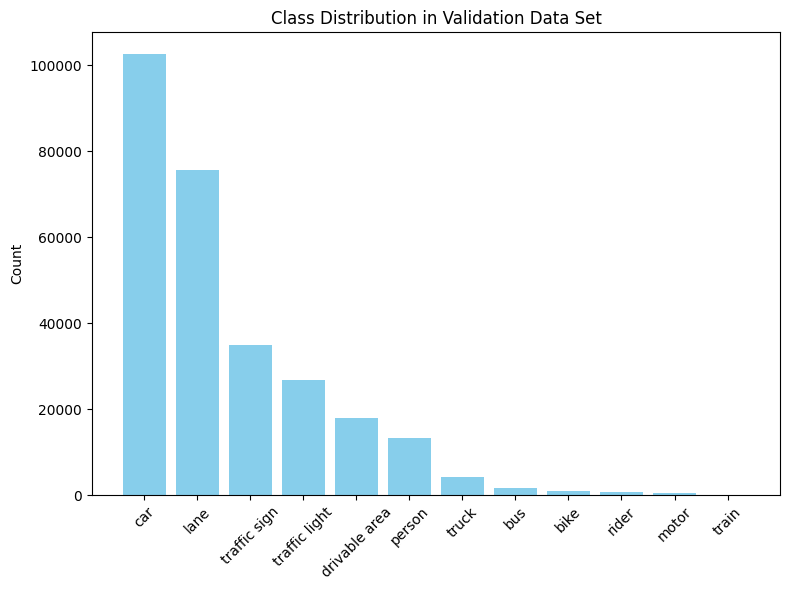

In [45]:
plt.figure(figsize=(8, 6))
plt.bar(val_category_count_df['Category'], val_category_count_df['Count'], color='skyblue')
plt.title(f"Class Distribution in Validation Data Set")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [46]:
print(set(all_categories))
class_cols = list(set(all_categories))

{'motor', 'lane', 'car', 'truck', 'traffic sign', 'person', 'bus', 'train', 'bike', 'drivable area', 'rider', 'traffic light'}


In [47]:
def attributes_groupby_plot(column_name):
    group = train_df.groupby(column_name)[class_cols].sum()

    fig, axes = plt.subplots(nrows=len(group), figsize=(10, 4 * len(group)))
    
    if len(group) == 1:
        axes = [axes]
    
    for ax, (attribute_name, row) in zip(axes, group.iterrows()):
        top_classes = row.sort_values(ascending=False).head(5)
        ax.bar(top_classes.index, top_classes.values, color='teal')
        ax.set_title(f"{column_name}: {attribute_name}")
        ax.set_ylabel("Count")
        ax.set_xticks(range(len(top_classes.index)))
        ax.set_xticklabels(top_classes.index, rotation=45)
    
    plt.tight_layout()
    plt.show()

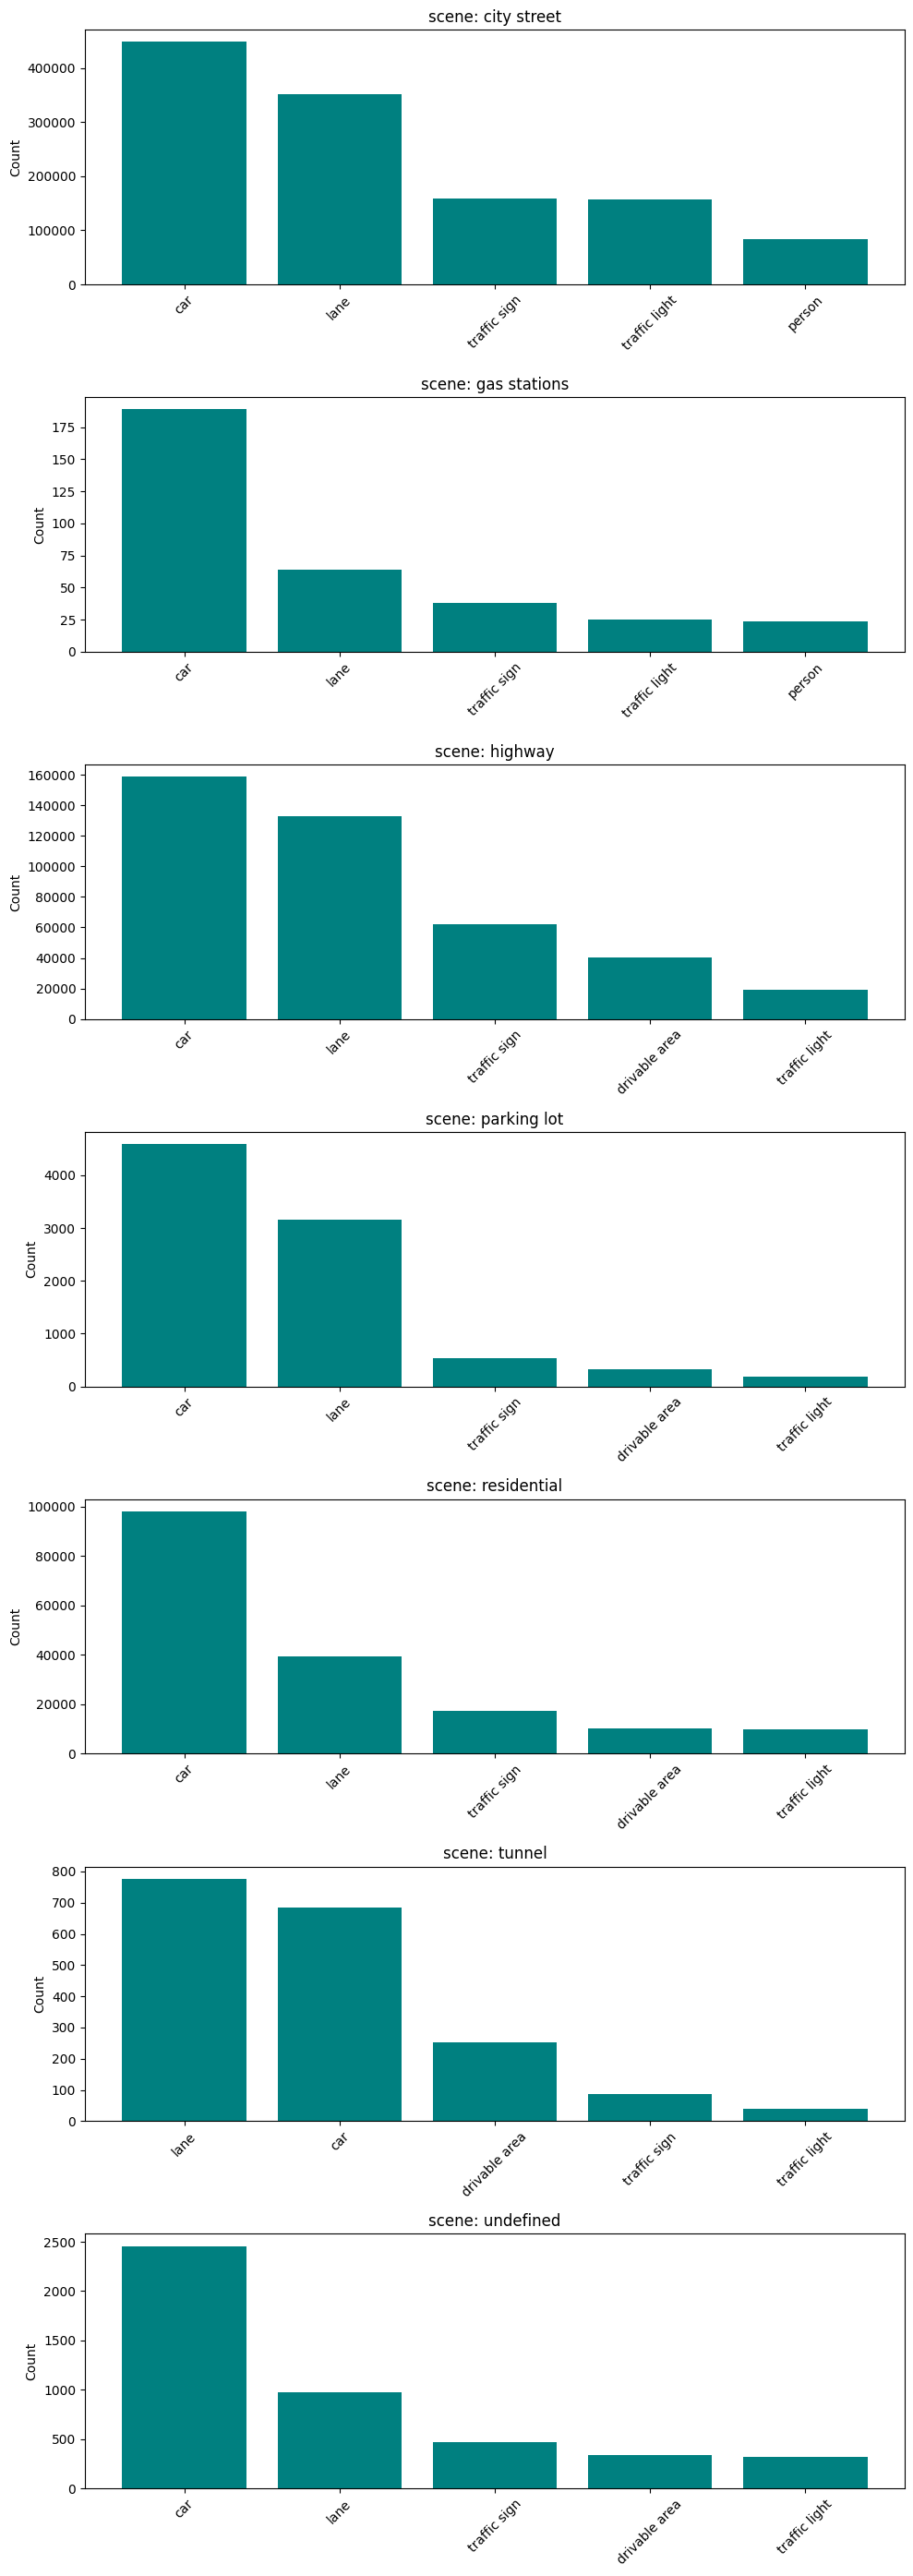

In [48]:
attributes_groupby_plot('scene')

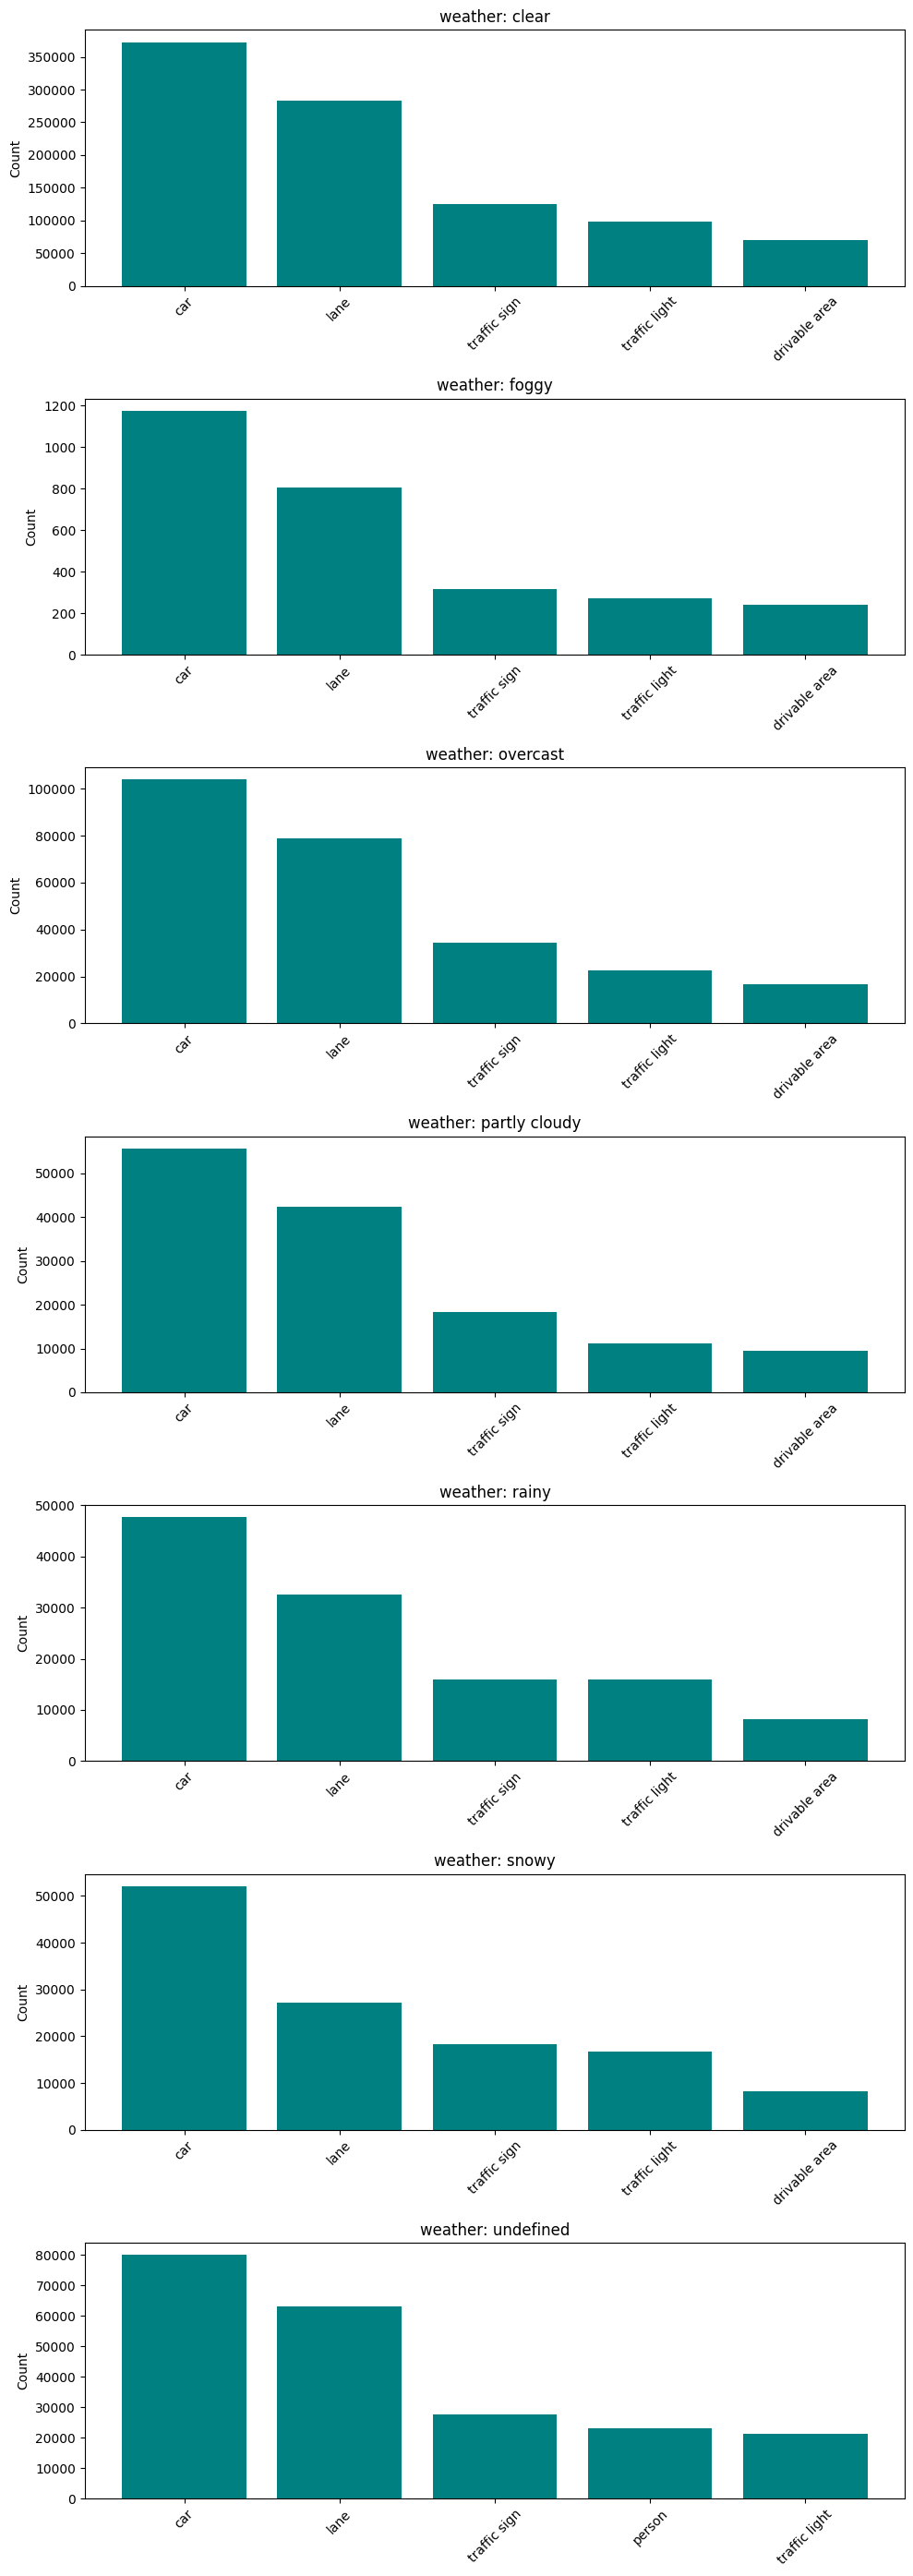

In [49]:
attributes_groupby_plot('weather')

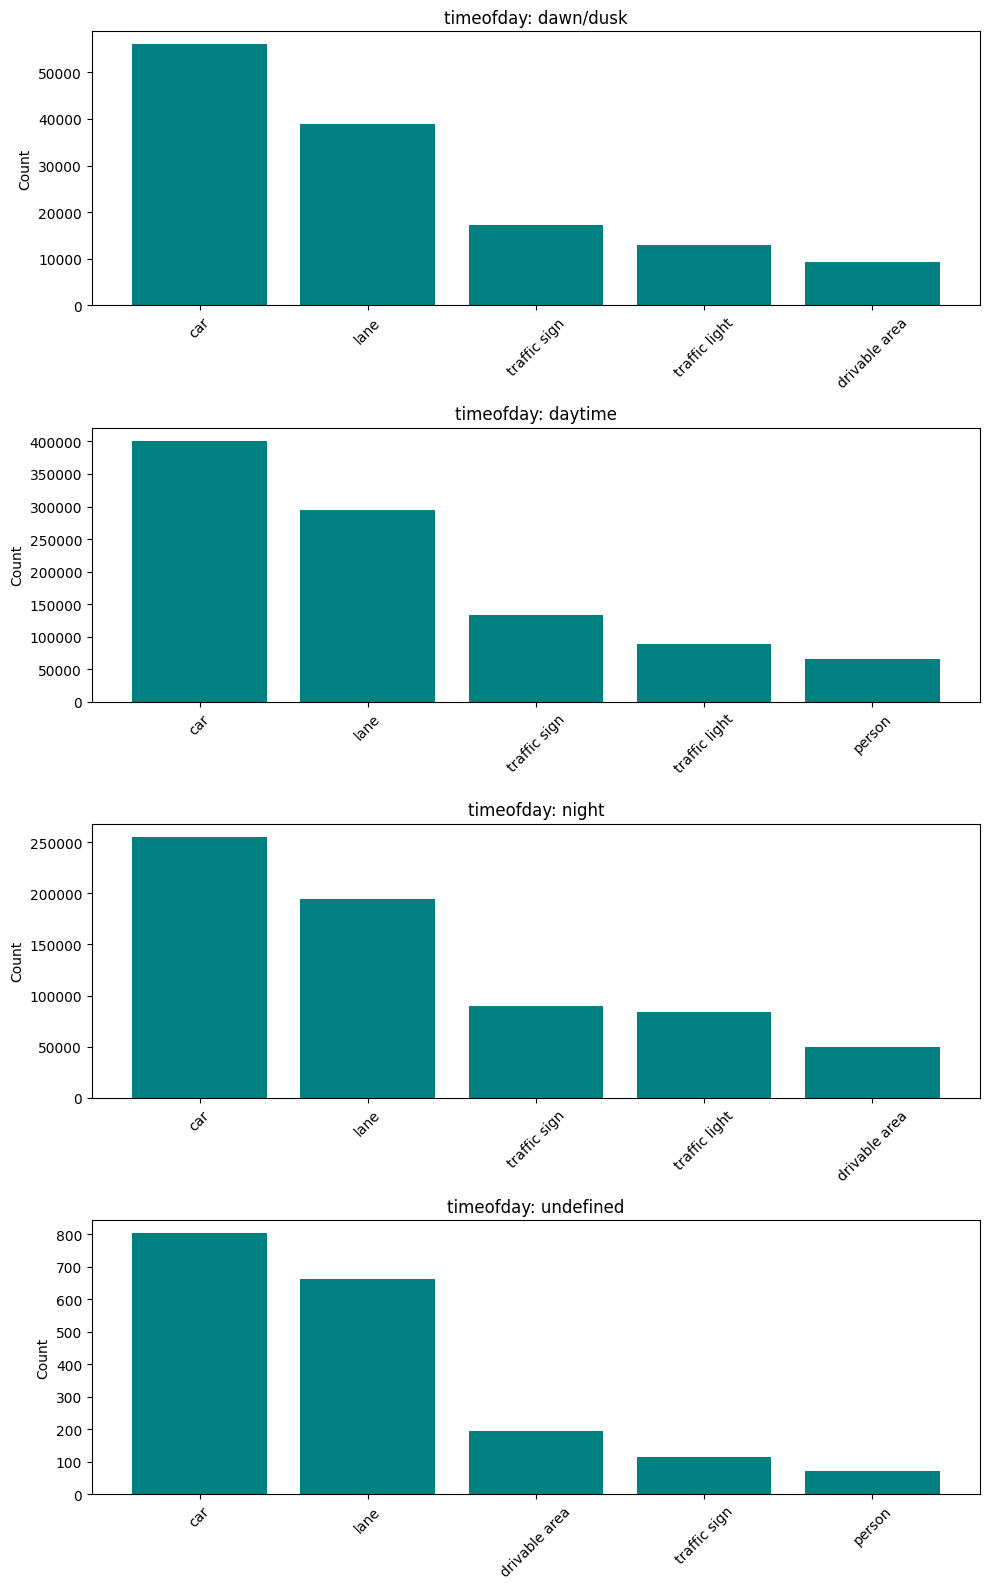

In [50]:
attributes_groupby_plot('timeofday')

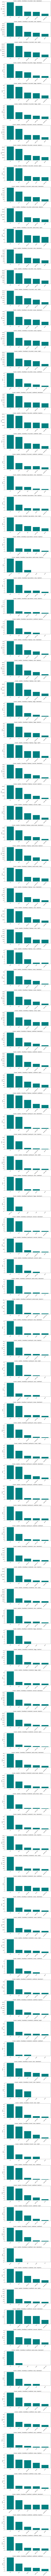

In [51]:
attributes_groupby_plot(['scene','weather','timeofday'])

In [52]:
for col in class_cols:
    print(f"\n Class: {col.upper()}")

    print("\n Grouped by WEATHER:")
    print(train_df.groupby('weather')[col].sum().sort_values(ascending=False))

    print("\n Grouped by SCENE:")
    print(train_df.groupby('scene')[col].sum().sort_values(ascending=False))

    print("\n Grouped by TIMEOFDAY:")
    print(train_df.groupby('timeofday')[col].sum().sort_values(ascending=False))



 Class: MOTOR

 Grouped by WEATHER:
weather
clear            1569
undefined         513
overcast          430
partly cloudy     261
rainy             125
snowy             102
foggy               2
Name: motor, dtype: int64

 Grouped by SCENE:
scene
city street     2372
residential      347
highway          273
parking lot        6
tunnel             2
undefined          2
gas stations       0
Name: motor, dtype: int64

 Grouped by TIMEOFDAY:
timeofday
daytime      2115
night         674
dawn/dusk     211
undefined       2
Name: motor, dtype: int64

 Class: LANE

 Grouped by WEATHER:
weather
clear            283828
overcast          78839
undefined         63018
partly cloudy     42486
rainy             32478
snowy             27187
foggy               807
Name: lane, dtype: int64

 Grouped by SCENE:
scene
city street     351225
highway         133013
residential      39431
parking lot       3157
undefined          976
tunnel             777
gas stations        64
Name: lane, dtype: i

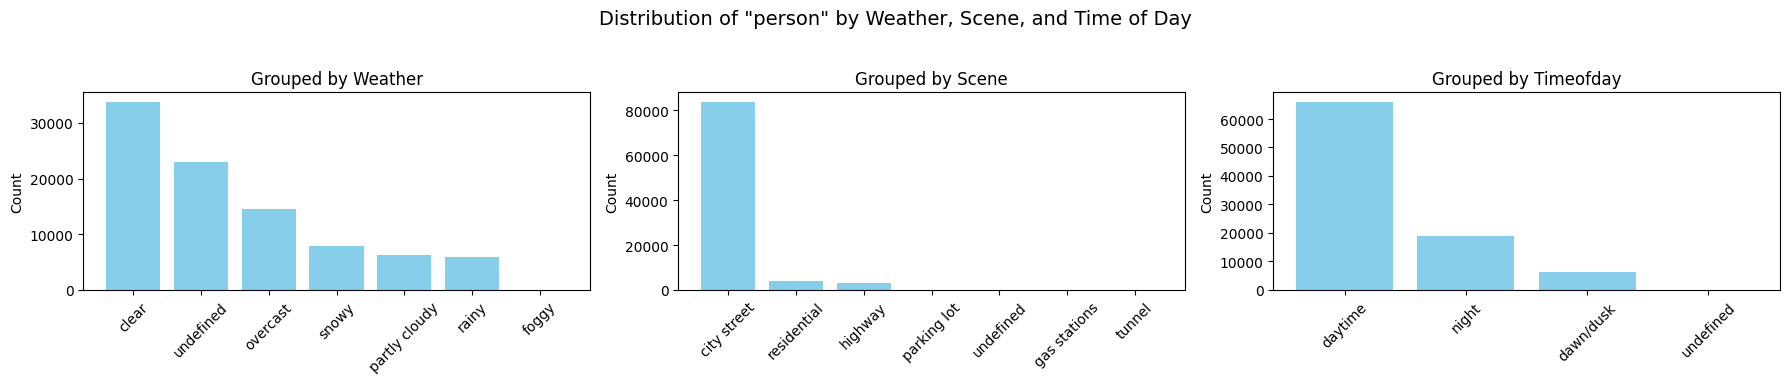

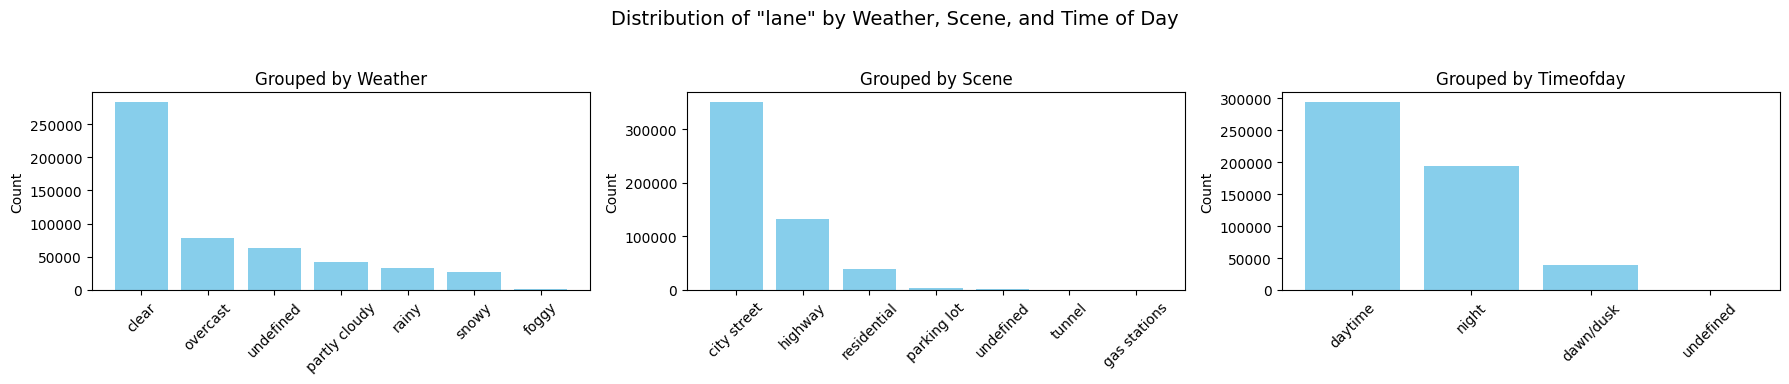

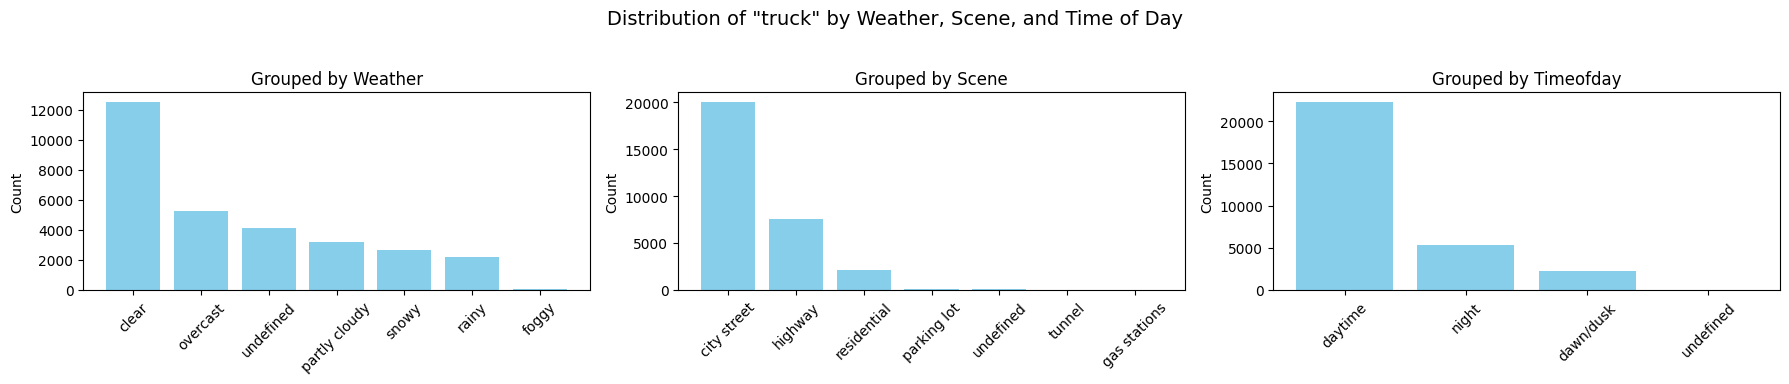

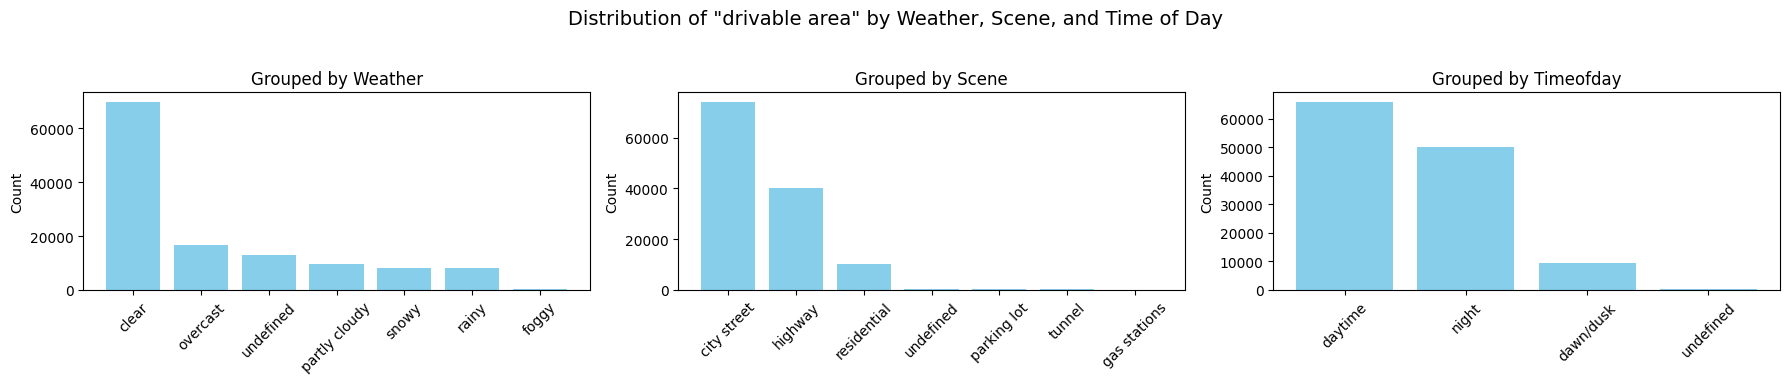

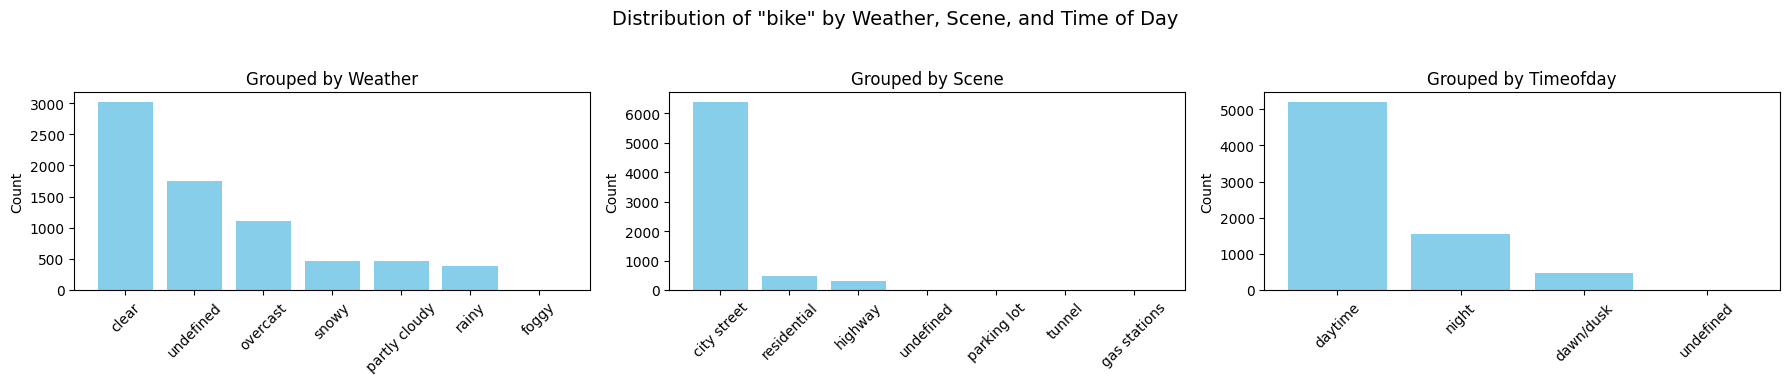

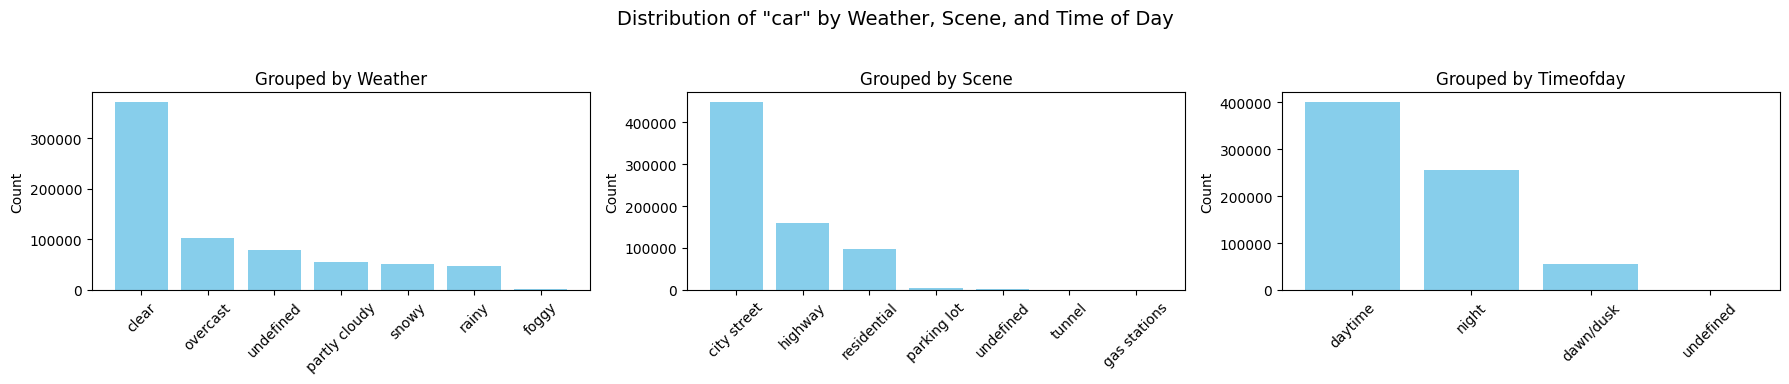

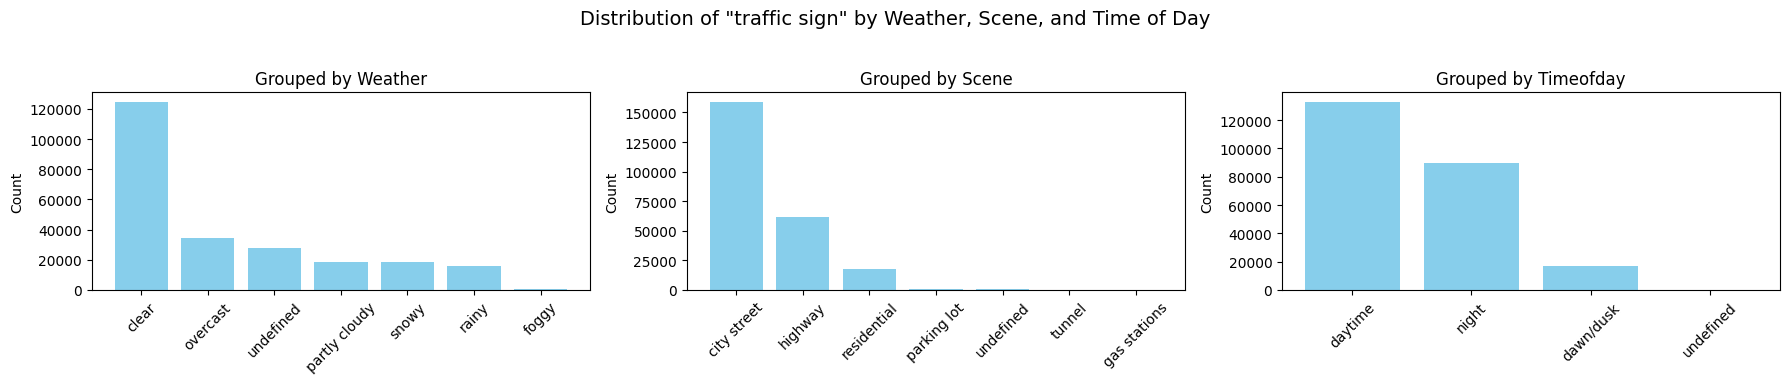

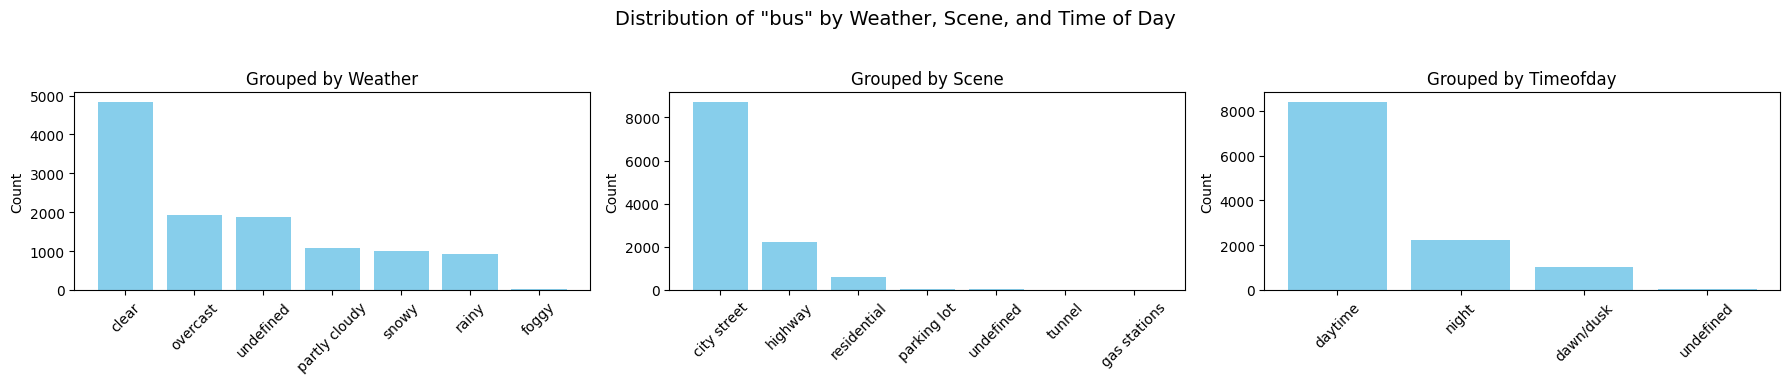

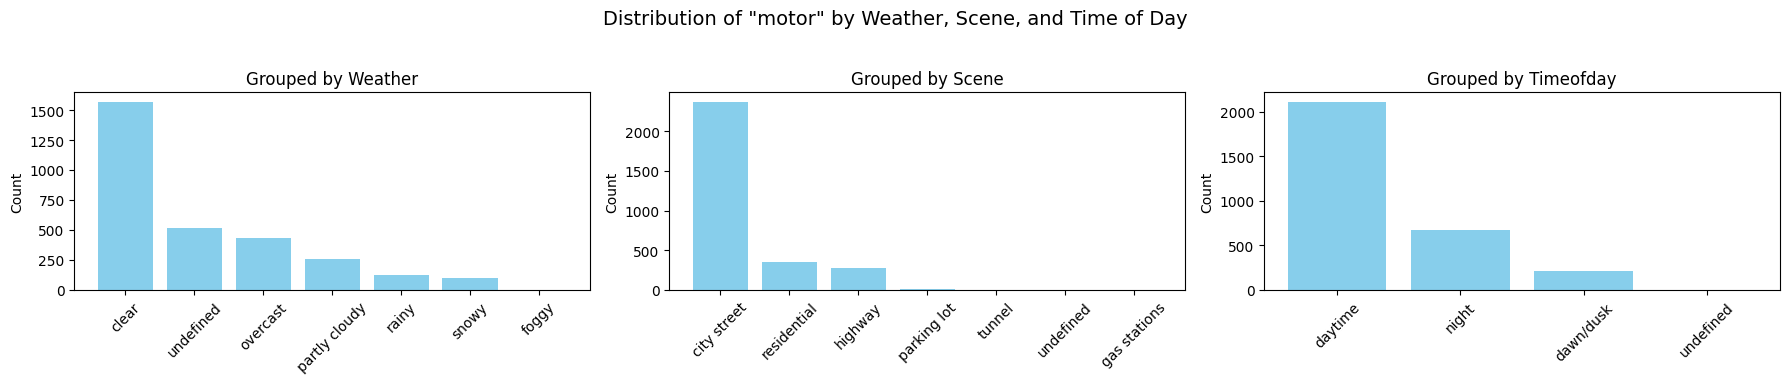

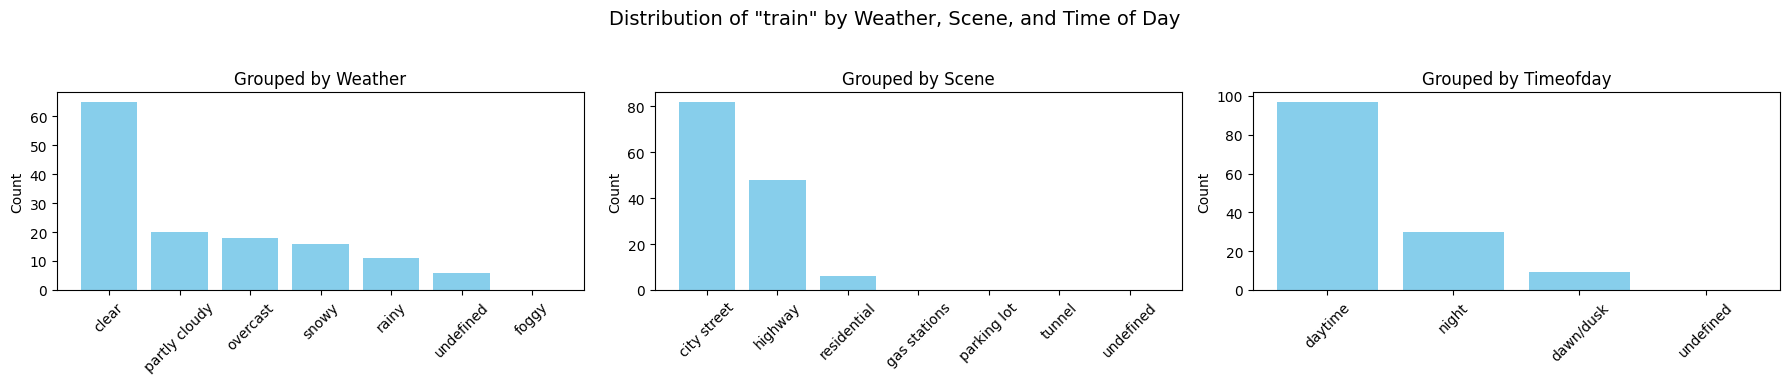

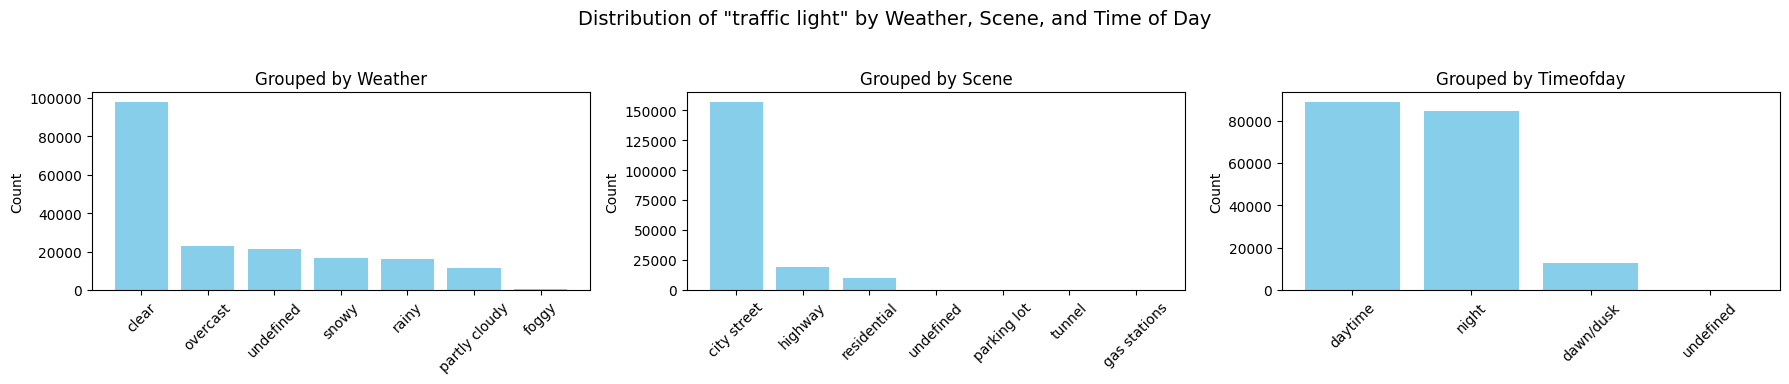

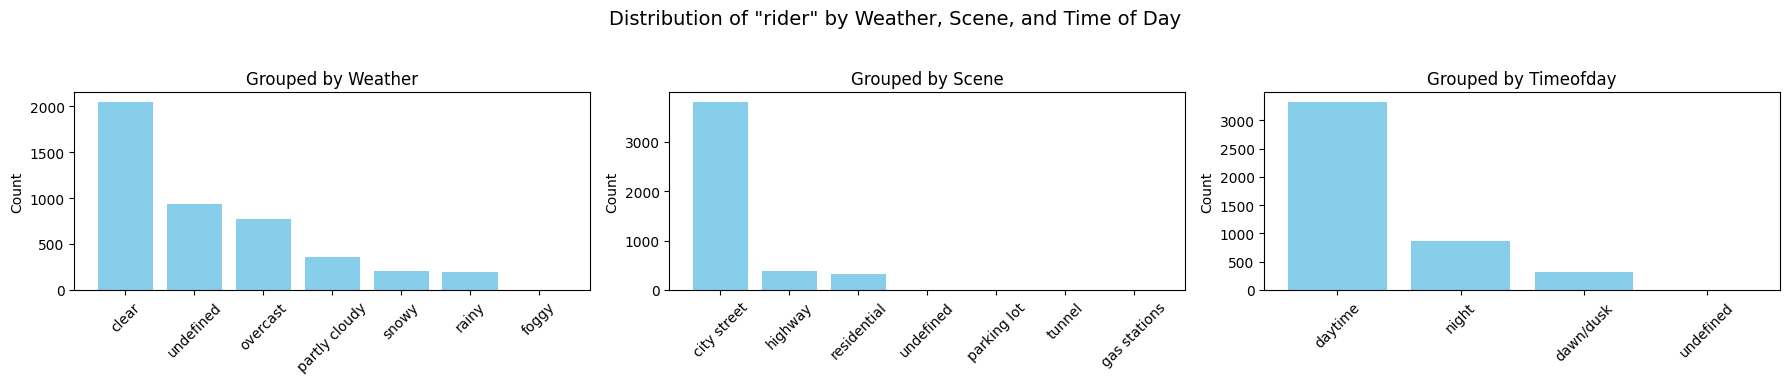

In [53]:
import matplotlib.pyplot as plt

class_cols = ['person', 'lane', 'truck', 'drivable area', 'bike', 'car',
              'traffic sign', 'bus', 'motor', 'train', 'traffic light', 'rider']

group_cols = ['weather', 'scene', 'timeofday']

for cls in class_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(f'Distribution of "{cls}" by Weather, Scene, and Time of Day', fontsize=14)

    for i, group in enumerate(group_cols):
        grouped = train_df.groupby(group)[cls].sum().sort_values(ascending=False)
        axes[i].bar(grouped.index, grouped.values, color='skyblue')
        axes[i].set_title(f'Grouped by {group.capitalize()}')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Anamoly and conflict Detection

In [54]:
anomalies = []

for idx, row in train_df.iterrows():
    if row['scene'] == 'highway' and row.get('person', 0) > 0:
        anomalies.append("person in highway")
    if row['scene'] == 'gas stations' and row.get('train', 0) > 0:
        anomalies.append("train in gas station")
    if row['scene'] == 'residential' and row.get('traffic light', 0) > 0:
        anomalies.append("traffic light in residential")
    if row['scene'] == 'tunnel' and row.get('bike', 0) > 0:
        anomalies.append("bike in tunnel")
    if row['scene'] == 'parking lot' and row.get('train', 0) > 0:
        anomalies.append("train in parking lot")
    if row['scene'] == 'residential' and row.get('bus', 0) > 0:
        anomalies.append("bus in residential area")
    if row['scene'] == 'gas stations' and row.get('traffic light', 0) > 0:
        anomalies.append("traffic light in gas station")

    if row['weather'] == 'snowy' and row.get('motor', 0) > 0:
        anomalies.append("motorcycle during snowy weather")
    if row['weather'] == 'foggy' and row.get('bike', 0) > 0:
        anomalies.append("bike during foggy weather")
    if row['weather'] == 'rainy' and row.get('person', 0) > 3:
        anomalies.append("many people during rainy weather")
    if row['weather'] == 'snowy' and row.get('bus', 0) > 0:
        anomalies.append("bus during snowy weather")
    if row['timeofday'] == 'night' and row.get('pedestrian', 0) > 0:
        anomalies.append("pedestrian at night")

    if row['timeofday'] == 'dawn/dusk' and row.get('traffic sign', 0) == 0:
        anomalies.append("no traffic signs during dawn/dusk")
    if row['timeofday'] == 'night' and row.get('bike', 0) > 0:
        anomalies.append("bike during night")

    #Conflicts
    if row['scene'] == 'city street' and row.get('drivable area', 0) == 0:
        anomalies.append("no drivable area in city street")
    if row['scene'] == 'highway' and row.get('lane', 0) == 0:
        anomalies.append("no lanes on highway")


In [55]:
anomaly_summary = pd.Series(anomalies).value_counts().reset_index()
anomaly_summary.columns = ['Anomaly Reason', 'Count']

print(anomaly_summary)

                       Anomaly Reason  Count
0        traffic light in residential   2636
1     no drivable area in city street   2406
2                   person in highway   1457
3                   bike during night    962
4   no traffic signs during dawn/dusk    916
5            bus during snowy weather    753
6             bus in residential area    544
7    many people during rainy weather    516
8                 no lanes on highway    237
9     motorcycle during snowy weather     83
10       traffic light in gas station      7
11          bike during foggy weather      6
12                     bike in tunnel      1


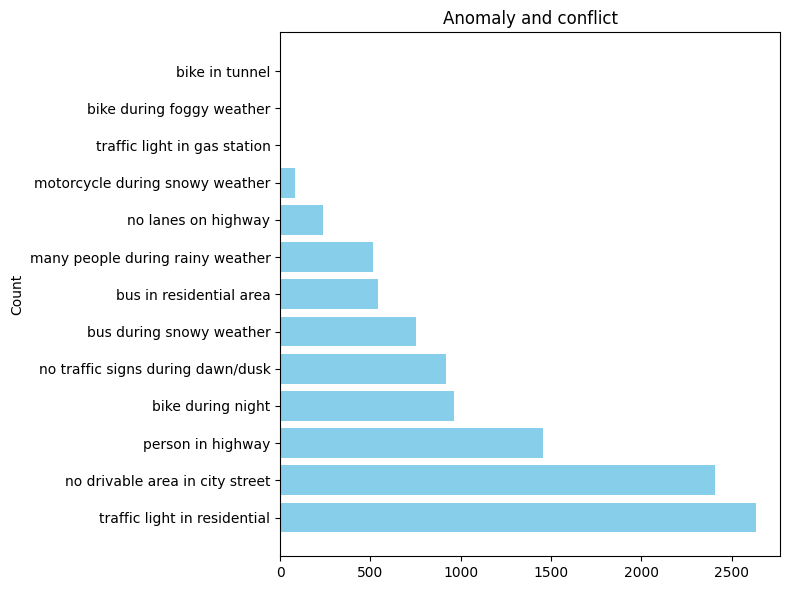

In [56]:
plt.figure(figsize=(8, 6))
plt.barh(anomaly_summary['Anomaly Reason'], anomaly_summary['Count'], color='skyblue')
plt.title(f"Anomaly and conflict")
plt.ylabel("Count")
plt.tight_layout()
plt.show()